In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid

In [3]:
train = pd.read_csv("newsgroups/trainMAtrixModified.txt", sep="\t", header=None)
train = train.T
train.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
np.set_printoptions(precision=2, linewidth=100, suppress=True)
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train)
train_norm = min_max_scaler.fit_transform(train)
train_norm[:5]

array([[0.33, 0.67, 0.5 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.33, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.33, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [4]:
test = pd.read_csv("newsgroups/testMatrixModified.txt", sep="\t", header=None)
test = test.T
test.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
min_max_scaler.fit(test)
test_norm = min_max_scaler.fit_transform(test)
test_norm[:5]

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [6]:
train_classes_df = pd.read_csv("newsgroups/trainClasses.txt", sep="\t", header=None, index_col=0, names=['Class'])
classes = train_classes_df.Class
train_classes = np.array(classes)
train_classes[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [7]:
test_classes_df = pd.read_csv("newsgroups/testClasses.txt", sep="\t", header=None, index_col=0, names=['Class'])
classes = test_classes_df.Class
test_classes = np.array(classes)
test_classes[:5]

array([1, 0, 0, 1, 1], dtype=int64)

Both train and test datasets have been normalized using min-max scaling.

# 1-a <br>
KNN function takes the vector to classify (x), the data matrix (D), number of neighbors (K). and the distance metric (m). <br>
Compute euclidean distance if m = 0, cosine distance if m = 1. <br>
Counts labels of K nearest neighbors. <br>
Return most common label of the nearest neighbors and a list of their indeces.

In [8]:
def knn(x, D, labels, K, m):
    if m == 0:
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif m == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    ids = np.argsort(dists)
    n_labels = labels[ids[:K]]
    count = Counter(n_labels)
    # print("Labels for top ", K, "neighbors: ", count.most_common())
    return count.most_common(1)[0][0], ids[:K]

In [9]:
label, n_ids = knn(test_norm[100], train_norm, train_classes, 5, 0)
print(label)
print(train.iloc[n_ids])

0
     0     1     2     3     4     5     6     7     8     9     ...  5490  \
525   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
757   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
798   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
711   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
38    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     5491  5492  5493  5494  5495  5496  5497  5498  5499  
525   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
757   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
798   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
711   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
38    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5500 columns]


With 3 out of 5 closest neighbors being class 0, we can classify this instance as Microsoft Windows.

## 1-b
knn_eval takes the training and testing data and labels as well as the K number of neighbors and the distance measure. <br>
Goes through every row in the test data and calls the knn function. <br>
Evaluates the returned predicted class label and compares it to its actual label. <br>
Calculates the error by comparing the number of innacurate predictions to the total number of rows. <br>

In [10]:
def knn_eval(train_data, train_labels, test_data, test_labels, K, m):
    errors = 0
    for i in range(len(test_data)):
        result = knn(test_data[i,:],train_data, train_labels, K, m)[0]
        # print("Predicted Label: ", result, "==> Actual Label: ", test_labels[i])
        if (result != test_labels[i]): 
            errors += 1
    acc = 1 - (errors/float(len(test_data)))
    return acc

In [11]:
knn_eval(train_norm, train_classes, test_norm, test_classes, 5, 0)

0.61

The accuracy of KNN when K = 5 is 61%.

## 1-c
Run the knn_eval function for K values between 5 and 100, incremented by 5. Do this for both euclidean and cosine distances. Store the results of each in a list.

In [12]:
euclidean_acc = []
cosine_acc = []
print("Euclidean")
for i in range(5,101,5):
    acc = knn_eval(train_norm, train_classes, test_norm, test_classes, i, 0)
    euclidean_acc.append(acc)
    print(i, acc)
print()
print("Cosine")
for i in range(5,101,5):
    acc = knn_eval(train_norm, train_classes, test_norm, test_classes, i, 1)
    cosine_acc.append(acc)
    print(i,acc)

Euclidean
5 0.61
10 0.525
15 0.505
20 0.495
25 0.495
30 0.495
35 0.495
40 0.495
45 0.495
50 0.495
55 0.495
60 0.495
65 0.495
70 0.495
75 0.495
80 0.495
85 0.495
90 0.495
95 0.495
100 0.495

Cosine
5 0.96
10 0.96
15 0.95
20 0.955
25 0.945
30 0.945
35 0.945
40 0.94
45 0.935
50 0.94
55 0.935
60 0.94
65 0.94
70 0.94
75 0.935
80 0.9299999999999999
85 0.925
90 0.935
95 0.9299999999999999
100 0.9299999999999999


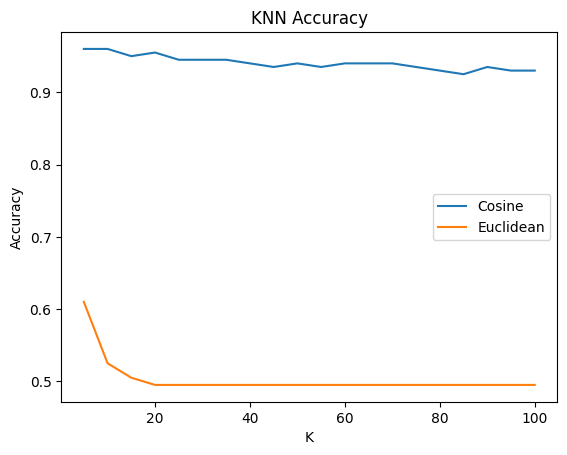

In [15]:
plt.plot(range(5,101,5), cosine_acc, label='Cosine')
plt.plot(range(5,101,5), euclidean_acc, label='Euclidean')
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Cosine distance is significantly more accurate then euclidean distance and maintains its high accuracy across all values of K, with its highest at K=5. Euclidean distance also has its highest accuracy when K=5 and bottoms out at 50% when K=20 and beyond.

## 1-d
Create new datasets by converting the train and test sets into TFxIDF.<br>
Evaluate the KNN results using cosine similarity.<br>
Compare results to the those without using TFxIDF.

In [28]:
train_freqs = pd.DataFrame(train.sum(axis=0)).T
train_freqs

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,102.0,11.0,22.0,959.0,222.0,84.0,108.0,262.0,55.0,318.0,...,3.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0


In [30]:
test_freqs = pd.DataFrame(test.sum(axis=0)).T
test_freqs

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,24.0,0.0,1.0,251.0,45.0,26.0,20.0,41.0,13.0,98.0,...,3.0,1.0,3.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0


In [25]:
# train.shape
train_NMatrix = np.ones(np.shape(train), dtype=float)*train.shape[0]
print(train_NMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [26]:
test_NMatrix = np.ones(np.shape(test), dtype=float)*test.shape[0]
print(test_NMatrix)

[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 ...
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]


In [35]:
train_IDF = np.log2(np.divide(train_NMatrix, np.array(train_freqs)))
print(train_IDF)

[[2.97143085 6.18442457 5.18442457 ... 8.64385619 8.64385619 8.64385619]
 [2.97143085 6.18442457 5.18442457 ... 8.64385619 8.64385619 8.64385619]
 [2.97143085 6.18442457 5.18442457 ... 8.64385619 8.64385619 8.64385619]
 ...
 [2.97143085 6.18442457 5.18442457 ... 8.64385619 8.64385619 8.64385619]
 [2.97143085 6.18442457 5.18442457 ... 8.64385619 8.64385619 8.64385619]
 [2.97143085 6.18442457 5.18442457 ... 8.64385619 8.64385619 8.64385619]]


In [43]:
test_freqs[test_freqs == 0] = 1
test_IDF = np.log2(np.divide(test_NMatrix, np.array(test_freqs)))
print(test_IDF)

[[3.05889369 7.64385619 7.64385619 ... 7.64385619 7.64385619 7.64385619]
 [3.05889369 7.64385619 7.64385619 ... 7.64385619 7.64385619 7.64385619]
 [3.05889369 7.64385619 7.64385619 ... 7.64385619 7.64385619 7.64385619]
 ...
 [3.05889369 7.64385619 7.64385619 ... 7.64385619 7.64385619 7.64385619]
 [3.05889369 7.64385619 7.64385619 ... 7.64385619 7.64385619 7.64385619]
 [3.05889369 7.64385619 7.64385619 ... 7.64385619 7.64385619 7.64385619]]


In [ ]:
train_TFxIDF = train * train_IDF
train_TFxIDF

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,5.94,12.37,10.37,-0.26,14.80,19.51,5.78,12.88,7.72,5.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,-0.26,1.85,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,-0.26,0.00,0.00,0.00,3.22,0.00,1.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.94,0.00,0.00,-0.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.94,0.00,0.00,-0.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.00,0.00,0.00,-0.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.00,0.00,0.00,-0.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.00,0.00,0.00,-0.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.00,0.00,0.00,-0.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
test_TFxIDF = test * test_IDF
test_TFxIDF

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,1.03,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.06,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,1.03,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,1.03,...,6.06,7.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.00,0.0,0.0,-0.33,0.0,0.0,0.0,0.0,0.0,1.03,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
train_TFxIDF = np.array(train_TFxIDF)
test_TFxIDF = np.array(test_TFxIDF)
tfidf_acc = []
print("TFxIDF")
for i in range(5,101,5):
    acc = knn_eval(train_TFxIDF, train_classes, test_TFxIDF, test_classes, i, 1)
    tfidf_acc.append(acc)
    print(i, acc)

TFxIDF
5 0.97
10 0.98
15 0.985
20 0.99
25 0.985
30 0.99
35 0.985
40 0.99
45 0.995
50 0.995
55 0.99
60 0.995
65 0.995
70 0.985
75 0.98
80 0.985
85 0.98
90 0.98
95 0.97
100 0.975


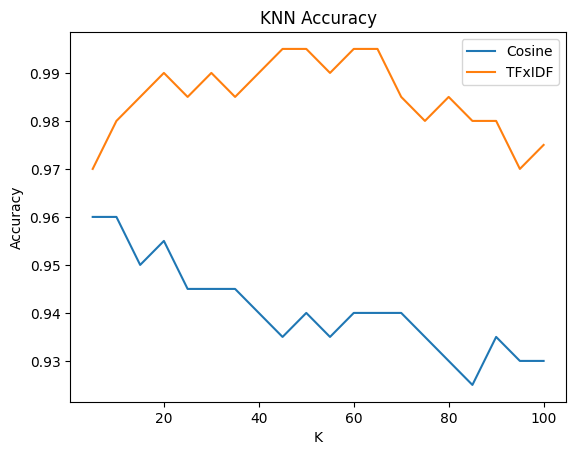

In [56]:
plt.plot(range(5,101,5), cosine_acc, label='Cosine')
plt.plot(range(5,101,5), tfidf_acc, label='TFxIDF')
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

TFxIDF outperforms the cosine distance measure with the normalized data. TFxIDF has an accuracy of 99.5% when K=45.

## 1-e
Implement Rocchio Method. <br>
Create training function to calculate prototype vectors for each class. <br>
Test function calculates cosine similarity to each prototype vector and returns class label. <br>
Compare the results to the TFxIDF results.

In [142]:
def train_rocchio(data, labels):
    prototypes = {}
    for label in np.unique(labels):
        idx = np.where(labels == label)
        prototypes[label] = np.array(data[idx].sum(axis=0))
    return prototypes

In [145]:
rp = train_rocchio(train_TFxIDF, train_classes)
rp

{0: array([169.37155832,  24.73769828,  25.92212286, ...,   8.64385619,
         17.28771238,  17.28771238]),
 1: array([133.71438815,  43.290972  ,  88.13521771, ...,   8.64385619,
          0.        ,   0.        ])}

In [178]:
def rocchio(x, prototypes):
    m = -2
    for i in prototypes.keys():
        D_norm = np.linalg.norm(prototypes[i])
        x_norm = np.linalg.norm(x)
        sims = np.dot(prototypes[i],x)/(D_norm * x_norm)
        if sims > m:
            m = sims
            r = i
        # print(i, sims)
    return r

In [173]:
rocchio(test_TFxIDF[100], rp)

0 0.03162004804750928
1 0.14379245429042362


1

In [174]:
def eval_rocchio(train_data, train_labels, test_data, test_labels):
    prototypes = train_rocchio(train_data, train_labels)
    errors = 0
    for i in range(len(test_data)):
        result = rocchio(test_data[i], prototypes)
        # print("Predicted Label: ", result, "==> Actual Label: ", test_labels[i])
        if (result != test_labels[i]): 
            errors += 1
    acc = 1 - (errors/float(len(test_data)))
    return acc
    

In [179]:
eval_rocchio(train_TFxIDF, train_classes, test_TFxIDF, test_classes)

0.995

The Rocchio Method resulted in an accuracy of 99.5%. This is the same accuracy as the TFxIDF method. However, the Rocchio method doesn't require tuning and, with only two class prototype vectors that needed to be calculated, made testing much faster than KNN.

## 1-f
Use scikit-learn's Nearest Centroid to classify the data.<br>
Compare the results to the Rocchio Method.

In [177]:
model = NearestCentroid()
model.fit(train_TFxIDF, train_classes)
model.score(test_TFxIDF, test_classes)

0.985

The Nearest Centroid method produced a 98.5% accuracy. With a 99.5% accuracy, the Rocchio Method out performed the scikit-learn nearest centroid classification.